In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

In [2]:
salary = pd.read_csv('Employee_Salary.csv')

In [3]:
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [4]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


### Visualize data

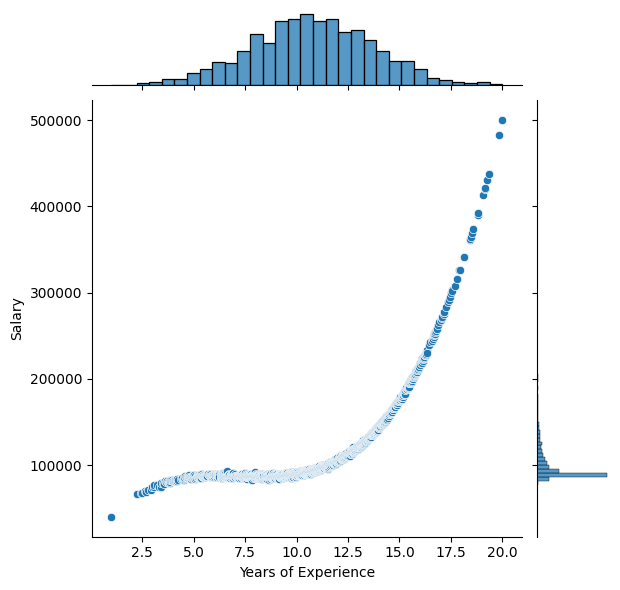

In [7]:
sns.jointplot(x='Years of Experience', y = 'Salary', data = salary)

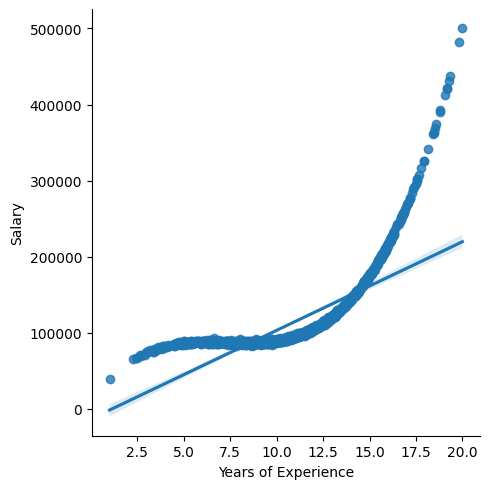

In [12]:
sns.lmplot(x='Years of Experience', y = 'Salary', data = salary)

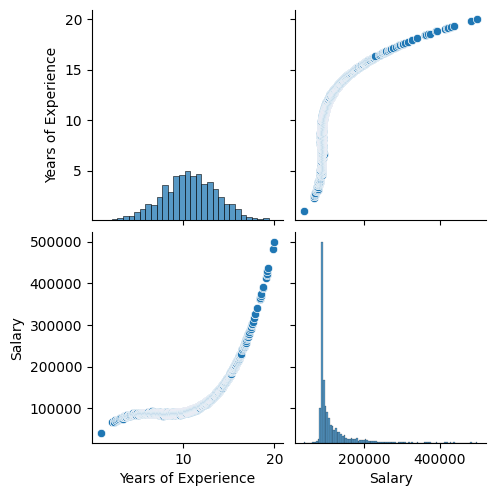

In [15]:
sns.pairplot(data = salary)

### Creating training dataset

In [16]:
X = salary[['Years of Experience']]
X.shape

(2000, 1)

In [19]:
y = salary[['Salary']]
y.shape

(2000, 1)

In [20]:
X_train = X
y_train = y

### Model training (linear)

In [22]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression(fit_intercept = True)

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
print('Linear model coeff 1:', model.coef_ )
print('Linear model coeff 2:', model.intercept_ )
print('Linear model score:', model.score(X_train, y_train))

Linear model coeff 1: [[11640.22916165]]
Linear model coeff 2: [-13063.09931519]
Linear model score: 0.5966517109441396


### Visualize the results


Text(0.5, 1.0, 'Salary vs. Years of Experience (Linear)')

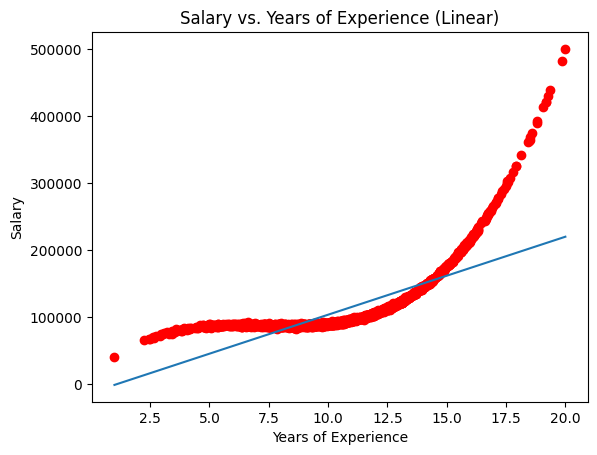

In [42]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train))
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience (Linear)')

### Model training (poly) 

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly_model2 = PolynomialFeatures(degree=2)
poly_model3 = PolynomialFeatures(degree=3)

In [81]:
X_columns2 =  poly_model2.fit_transform(X_train)
X_columns3 =  poly_model3.fit_transform(X_train)

In [82]:
X_columns2

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [84]:
model2 = LinearRegression()
model2.fit(X_columns2, y_train)

model3 = LinearRegression()
model3.fit(X_columns3, y_train)

LinearRegression()

In [88]:
print('Linear model coeff 1:', model2.coef_ )
print('Linear model coeff 2:', model2.intercept_ )
print('Linear model score:', model2.score(X_columns2, y_train))
print('-------')
print('Linear model coeff 1:', model3.coef_ )
print('Linear model coeff 2:', model3.intercept_ )
print('Linear model score:', model3.score(X_columns3, y_train))

Linear model coeff 1: [[     0.         -33106.32895617   2095.78613853]]
Linear model coeff 2: [207045.95366531]
Linear model score: 0.9292493460571956
-------
Linear model coeff 1: [[    0.         32261.24327461 -4503.00578987   205.20736238]]
Linear model coeff 2: [12053.10740862]
Linear model score: 0.9991980010982231


### Visualize data

In [90]:
y_predict2 = model2.predict(X_columns2)
y_predict3 = model3.predict(X_columns3)

Text(0.5, 1.0, 'Salary vs. Years of Experience (Poly order = 2,3)')

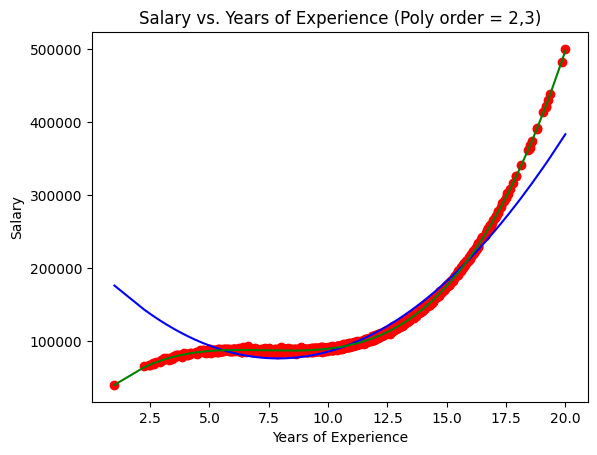

In [92]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict2, color = 'blue')
plt.plot(X_train, y_predict3, color = 'green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience (Poly order = 2,3)')